In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns

In [231]:
test_data=pd.read_csv('test.csv')
train_data=pd.read_csv('train.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [232]:
def classify_test(col,values):
  for i,val in enumerate(values):
     test_data.loc[test_data[col] == val,[col]] =i

In [233]:
test_data=test_data.merge(gender_submission,on='PassengerId')
test_data=test_data.fillna(0)
classify_test(col='Sex',values=['male','female'])
classify_test(col='Embarked',values=['S','C','Q'])
test_data=test_data.drop('Name',axis=1)
test_data=test_data.drop('Ticket',axis=1)
test_data=test_data.drop('Cabin',axis=1)

In [234]:
x_test=test_data[['Pclass','Fare','Sex','SibSp']]
y_test=test_data["Survived"]

In [235]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Fare    418 non-null    float64
 2   Sex     418 non-null    object 
 3   SibSp   418 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 16.3+ KB


In [236]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
def classify(col,values):
  for i,val in enumerate(values):
     train_data.loc[train_data[col] == val,[col]] =i

In [238]:
classify(col='Sex',values=['male','female'])
classify(col='Embarked',values=['S','C','Q'])

In [239]:
train_data=train_data.drop('Name',axis=1)
train_data=train_data.drop('Ticket',axis=1)
train_data=train_data.drop('Cabin',axis=1)

In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


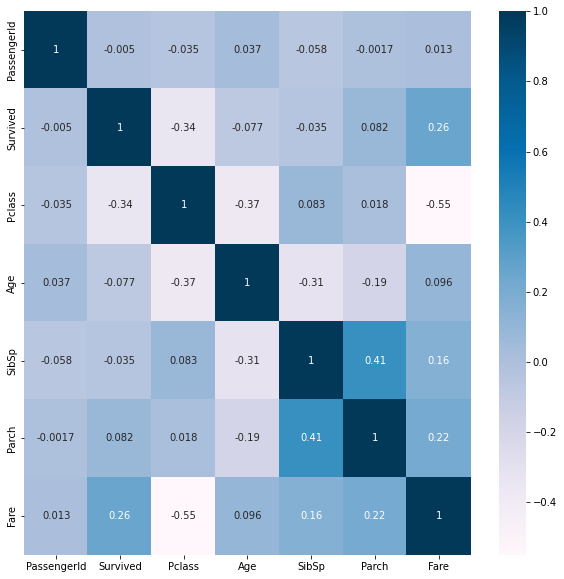

In [241]:
plt.figure(figsize=(10,10))
cor=train_data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [242]:
train_data=train_data.fillna(0)

In [243]:
from sklearn.model_selection import train_test_split 
x=train_data[['Pclass','Fare','Sex','SibSp']]
y=train_data["Survived"]

In [244]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

In [245]:
pred=clf.predict(x_test)

In [246]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       266
           1       0.82      0.81      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.87      0.87      0.87       418



In [247]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier()

In [248]:
pred_2=rfc.predict(x_test)

In [249]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       266
           1       0.86      0.80      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.86      0.87       418
weighted avg       0.88      0.88      0.88       418

